### Vamos a tomar como guía el libro Simulación, segunda edición de Sheldon M. Ross  

Del Capítulo 6: Método de Simulación por eventos discretos

#### Variables:

1. Variable de tiempo $t$: tiempo (simulado) transcurrido.

2. Variables de conteo: número de veces que ciertos eventos han ocurrido, hasta el instante $t$.
    
3. Variables de estado del sistema (ES): Describen el estado del sistema en el instante $t$.

Subrutina para generar $T_s$, el tiempo de la primera llegada después del instante s.

Paso 1: Sea $t = s$.

Paso 2: Generar $U$.

Paso 3: Sea $t = t - \frac{1}{\lambda} logU$.

Paso 4: Generar $U$.

Paso 5: Si $U \leq \frac{\lambda(t)}{\lambda}$, hacer $T_s = t$ y terminar.

Paso 6: Ir al paso 2.

### Ejercicio (080322):

1. Escribir el código para la subrutina que genera $T_s$.

In [1]:
import random
import matplotlib.pyplot as plt

#Función que genera el tiempo y numero de llegadas
def Ts(ta,T):  #Parámetros ta: tiempo de arrivo, T: tiempo total de simulación
    N = 0      #contador de llegadas
    t = 0      #Hora de simulación  
    num_arrivals = []
    time = []
    while t <= T:
        N += 1 #Se aumenta el número de llegadas
        t = t + random.expovariate(1/ta) #Generación del siguiente tiempo de llegada
        num_arrivals.append(N)
        time.append(t)
    print('Tiempo de ingresos al sistema: ', time)
    print('Arrivos totales: ', N)
    plt.scatter(time,num_arrivals)
    plt.step(time,num_arrivals)
    plt.ylabel('Número de llegada')
    plt.xlabel('Tiempo de ingreso')
    plt.show()

Tiempo de ingresos al sistema:  [0.07000483855731957, 2.461167645081177, 2.779762654532672, 3.7381145712962622, 8.302086370951933, 9.47857093172298, 11.45351944252842, 13.52399167328552, 16.42140303469391]
Arrivos totales:  9


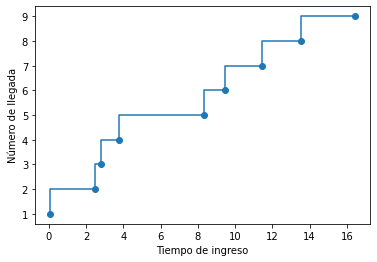

In [2]:
Ts(2,15)

### Línea de espera con un servidor.

Se requieren las siguientes variables:

1. Variable de tiempo: $t$.

2. Variables de conteo: 

$N_A$: tiempo de llegadas hasta $t$.
                        
$N_D$: número de salidas hasta $t$.

3. Variables de estado del sistema:  $n$: número de clientes en el sistema en el instante $t$.

Lista de eventos: $t_A, t_D$, llegadas y salidas.

### Inicialización:

Sea $t = N_A = N_D = 0$.

Sea ES = 0.

Generar $T_0$ y hacer $t_A = T_0, t_D = \infty$

### Tarea: Codificar inicialización y casos (pp. 89-91)

Personas en el sistema      1     Tiempo de llegada      2.011
Personas en el sistema      0     Tiempo de salida      3.733
Personas en el sistema      1     Tiempo de llegada      8.778
Personas en el sistema      0     Tiempo de salida      8.908
Personas en el sistema      1     Tiempo de llegada      9.481
Personas en el sistema      2     Tiempo de llegada     10.906
Personas en el sistema      1     Tiempo de salida     11.447
Personas en el sistema      0     Tiempo de salida     11.649
Personas en el sistema      1     Tiempo de llegada     12.337
Personas en el sistema      0     Tiempo de salida     12.346
Personas en el sistema      1     Tiempo de llegada     13.547
Personas en el sistema      0     Tiempo de salida     14.032
Personas en el sistema      1     Tiempo de llegada     19.276
Personas en el sistema      0     Tiempo de salida     19.680
Personas en el sistema      1     Tiempo de llegada     22.430
Personas en el sistema      0     Tiempo de salida     24.178


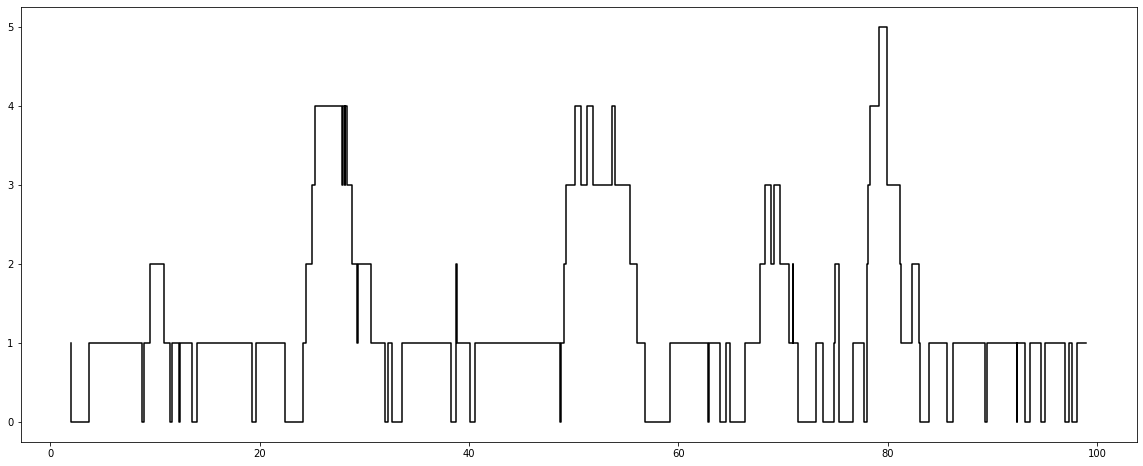

In [3]:
#Inicialización 
lamb = 2         #tiempo promedio de llegadas
mu = 1           #tiempo de atención
t = 0            #tiempo transcrurrido
NA = 0           #numero de llegadas
ND = 0           #numero de salidas
tA = t + random.expovariate(1/lamb) #hora de la primer llegada
tD = 1000000     #hora de salida
T = 100          #Tiempo de simulación
x = []           #Tiempos de ingreso y salida
y = []           #Personas en el sistema
while min(tA,tD) < T: #Se usa el mínimo para no rebasar T = 100
    if tA <= tD: #Simulación de llegada
        t = tA
        NA += 1
        x.append(t)
        y.append(NA)
        print("Personas en el sistema ","%5d"%NA, "    Tiempo de llegada", "%10.3f"%t)
        tA = t + random.expovariate(1/lamb)
        if NA == 1: #Si llega un cliente se genera su tiempo de salida, a partir de dos clientes ya es tD > tA y es el else
            tD = t + random.expovariate(1/mu)
    else:
        t = tD
        NA = NA - 1
        x.append(t)
        y.append(NA)
        print("Personas en el sistema ", "%5d"%NA, "    Tiempo de salida", "%10.3f"%t)
        if NA > 0:
            tD = t + random.expovariate(1/mu) #Si hay mas clientes se genera el proximo tiempo de salida
        else:
            tD = 1000000 #Se vuelve a hacer un tiempo muy grande para que el proximo timepo sea de salida
plt.figure(1, figsize=(20, 8))
plt.step(x,y,color = 'Black')
plt.show()